## Plotting dopant diffusion
We learned that the dopant concentration can be computed as a function of depth ($x$) and also the amount of time ($t$) that the dopant is annealed:

$$n(x,t) = \frac{S}{\sqrt{\pi D t}} e^{-\frac{x^2}{4 D t}}$$

Where $D$ is the diffusion constant, $t$ is the amount of time in seconds that the sample has been annealed, and $S$ is the number of dopant atoms per unit area on the surface. We would like to visualize what this function looks like as we change parameters.

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

import sympy as sp

from IPython.html.widgets import interact

/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


Although we don't need these constants this time, we are developing good practice of having physical constants defined so that they are handy when we need them:

In [28]:
# Define physical constants as symbols
mu0, eps0, c, h, hbar, m_e, q_e, kB = sp.symbols('mu0 eps0 c h hbar m_e q_e kB')

constants = {
    mu0: 1.257e-6,  # Permeability of free space (H/m)
    eps0: 8.854e-12,  # Permittivity of free space (F/m)
    c: 3e8,  # Speed of light (m/s)
    h: 6.626e-34,  # Planck's constant (Js)
    hbar: 1.0546e-34,  # Reduced Planck's constant (Js)
    m_e: 9.1e-31,  # Electron mass (kg)
    q_e: 1.6e-19,  # Elementary charge (C)
    kB: 1.38e-23  # Boltzmann constant (J/K)
}

Let's start with a simple plot of the n-type dopant concentration as a function of depth for a time t = 20 min. Define your material parameters here with appropriate units:

In [3]:
n_PhosSolution = 3e20 # cm^-3
FilmThickness = 100e-7 # cm  (1 nm = 10^-7 cm)

D = 1e-15  # cm^2/s
t = 20*60 # sec
S = n_PhosSolution * FilmThickness  # cm^-2
n_Boron = (2e16+3e17)/2 # cm^-3

In [4]:
def n_x_t(S,D,x,t):
    return S/np.sqrt(np.pi*D*t) * np.exp(-x**2/(4*D*t))

Define your x-axis in appropriate units and define the function that you would like to plot (n_Phos, or the concentration of phosphorous dopant atoms), then plot it... Start with a linear plot, but ultimately a loglog plot will be more convenient.

In [23]:
x_nm = np.arange(0,1000,1)
x_cm = x_nm * 1e-7
n_Phos = n_x_t(S,D,x_cm,t)
n_Phos

array([1.54509681e+021, 1.54188121e+021, 1.53227450e+021, 1.51639615e+021,
       1.49444251e+021, 1.46668277e+021, 1.43345350e+021, 1.39515181e+021,
       1.35222750e+021, 1.30517426e+021, 1.25452026e+021, 1.20081829e+021,
       1.14463587e+021, 1.08654532e+021, 1.02711431e+021, 9.66896876e+020,
       9.06425201e+020, 8.46202348e+020, 7.86695960e+020, 7.28333111e+020,
       6.71496305e+020, 6.16520668e+020, 5.63692287e+020, 5.13247668e+020,
       4.65374215e+020, 4.20211650e+020, 3.77854240e+020, 3.38353716e+020,
       3.01722739e+020, 2.67938778e+020, 2.36948270e+020, 2.08670930e+020,
       1.83004092e+020, 1.59826979e+020, 1.39004807e+020, 1.20392653e+020,
       1.03839023e+020, 8.91890713e+019, 7.62874554e+019, 6.49808003e+019,
       5.51197733e+019, 4.65607780e+019, 3.91672856e+019, 3.28108257e+019,
       2.73716693e+019, 2.27392350e+019, 1.88122549e+019, 1.54987366e+019,
       1.27157559e+019, 1.03891139e+019, 8.45289100e+018, 6.84892596e+018,
       5.52624473e+018, 4

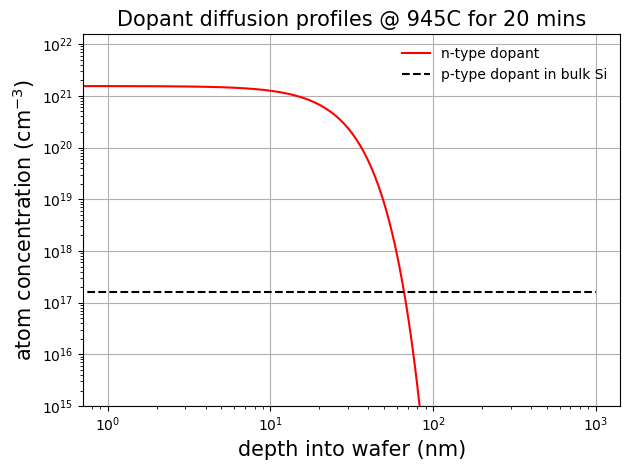

In [24]:
plt.loglog(x_nm,n_Phos,'r',label = 'n-type dopant')     # other plotting options: semilogy, semilogx, loglog
# draw horizontal line at a particular level 
plt.plot(x_nm, n_Boron * np.ones(len(x_nm)), 'k--',label = 'p-type dopant in bulk Si')

plt.xlabel('depth into wafer (nm)',fontsize=15)
plt.ylabel('atom concentration (cm$^{-3}$)',fontsize=15)
plt.title('Dopant diffusion profiles @ 945C for 20 mins',fontsize=15)
plt.grid(True)
plt.ylim([1e15,np.max(n_Phos)*10])

plt.legend(frameon=False,loc='best') 
plt.tight_layout() 

This is a nice tool: let's use widgets to help us visualize how the dopant concentration changes with our various parameters. Use this example to create your own interactive plot. Let's start just by varying the annealing times. Then if you are curious about the behavior as you change other variables, you can then explore that...

Define your interactive plot here (you could start with a linear plot as before to build intuition, then move to a loglog plot):

In [30]:
400000/3600

111.11111111111111

In [26]:
def plot_ndopant(anneal_time=2000):
    plt.ylim([1e15,0.5e22]) 
    n_PhosSolution = 3e20 # cm^-3
    FilmThickness = 100e-7 # cm  (1 nm = 10^-7 cm)

    D = 1e-15  # cm^2/s
    S = n_PhosSolution * FilmThickness  # cm^-2
    x_nm = np.arange(0,1000,1)
    x_cm = x_nm * 1e-7
    n_Phos_var = n_x_t(S,D,x_cm,anneal_time)
    plt.loglog(n_Phos_var)
    plt.plot(x_nm, n_Boron * np.ones(len(x_nm)), 'k--',label = 'p-type dopant in bulk Si')
    plt.grid(True)

    plt.xlabel('depth into wafer (nm)',fontsize=15)
    plt.ylabel('atom concentration (cm$^{-3}$)',fontsize=15)
    plt.title('Dopant diffusion profiles',fontsize=15)
    
interact(plot_ndopant, anneal_time=(350000, 450000));

interactive(children=(IntSlider(value=350000, description='anneal_time', max=450000, min=350000), Output()), _…

Some questions for you to consider:
* What happens to the doping concentration close to the surface for short anneal times compared with long annealing times? Why do you think this is?
* How long would you have to anneal at 925 C in order to extend the crossover depth to 1 um?
* If we were to change the dopant concentration, would that affect the crossover depth significantly? Why or why not?

## To do:
Please make a log-log plot below (hint: plt.loglog() instead of plt.plot() ), with legend, that shows the n-type dopant concentration as a function of depth for 3 different annealing times: 20 min, 40 min, and 100 min. Include this plot in your lab notebook, along with some narrative that explains what's happening, also addressing the questions above.

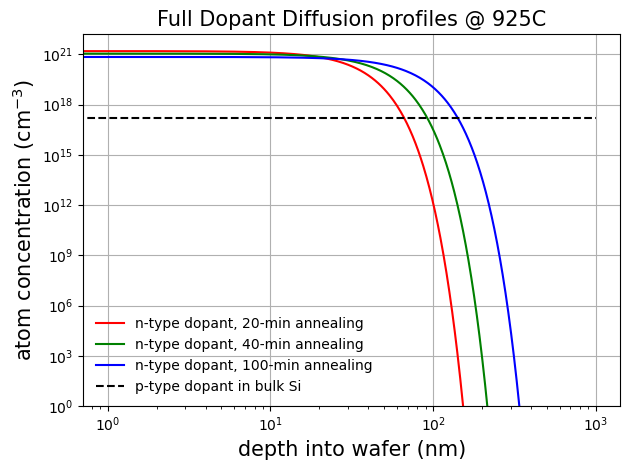

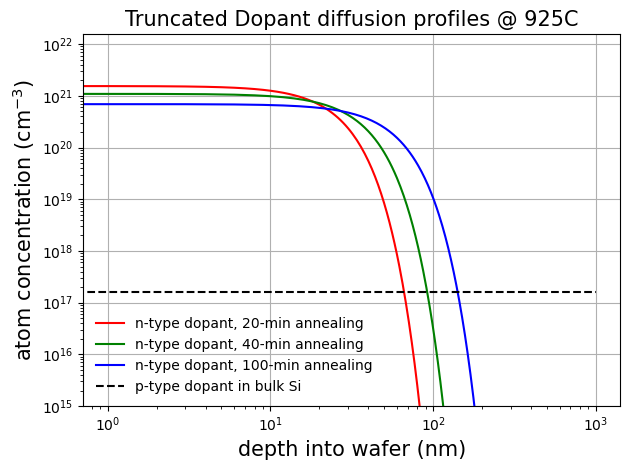

In [8]:
x_nm = np.arange(0,1000,1)
x_cm = x_nm * 1e-7

plt.loglog(x_nm,n_x_t(S,D,x_cm,20*60),'r',label = 'n-type dopant, 20-min annealing')
plt.loglog(x_nm,n_x_t(S,D,x_cm,40*60),'g',label = 'n-type dopant, 40-min annealing')
plt.loglog(x_nm,n_x_t(S,D,x_cm,100*60),'blue',label = 'n-type dopant, 100-min annealing')

# draw horizontal line at a particular level 
plt.plot(x_nm, n_Boron * np.ones(len(x_nm)), 'k--',label = 'p-type dopant in bulk Si')

plt.xlabel('depth into wafer (nm)',fontsize=15)
plt.ylabel('atom concentration (cm$^{-3}$)',fontsize=15)
plt.title('Full Dopant Diffusion profiles @ 925C',fontsize=15)
plt.grid(True)
plt.ylim([1,np.max(n_Phos)*10])

plt.legend(frameon=False,loc='best') 
plt.tight_layout() 
plt.show()

plt.loglog(x_nm,n_x_t(S,D,x_cm,20*60),'r',label = 'n-type dopant, 20-min annealing')
plt.loglog(x_nm,n_x_t(S,D,x_cm,40*60),'g',label = 'n-type dopant, 40-min annealing')
plt.loglog(x_nm,n_x_t(S,D,x_cm,100*60),'blue',label = 'n-type dopant, 100-min annealing')

# draw horizontal line at a particular level 
plt.plot(x_nm, n_Boron * np.ones(len(x_nm)), 'k--',label = 'p-type dopant in bulk Si')

plt.xlabel('depth into wafer (nm)',fontsize=15)
plt.ylabel('atom concentration (cm$^{-3}$)',fontsize=15)
plt.title('Truncated Dopant diffusion profiles @ 925C',fontsize=15)
plt.grid(True)
plt.ylim([1e15,np.max(n_Phos)*10])

plt.legend(frameon=False,loc='best') 
plt.tight_layout() 
plt.show()

In [59]:
D,t,S,n_B,x = sp.symbols('D t S n_B x')
f = S/sp.sqrt(sp.pi*D*t) * sp.exp(-x**2/(4*D*t))
f

S*exp(-x**2/(4*D*t))/(sqrt(pi)*sqrt(D*t))

In [70]:
k = f.subs([(D,1e-15),(S,n_PhosSolution * FilmThickness),(x,1000),(sp.pi,3.1416)])
k

5.35236609038188e+22*exp(-2.5e+20/t)/sqrt(t)

In [72]:
l = k-n_Boron
l

-1.6e+17 + 5.35236609038188e+22*exp(-2.5e+20/t)/sqrt(t)

In [84]:
eq = sp.Eq(l, 0)
eq

Eq(-1.6e+17 + 5.35236609038188e+22*exp(-2.5e+20/t)/sqrt(t), 0)

In [103]:
l.subs(t,5)

-1.6e+17 + 2.97255473634407e-21714724095162591361*sqrt(5)

# =====

In [4]:
import pandas as pd

In [10]:
c = pd.read_csv('channel1.csv')
c

,A,B
0,-4.000,-8.6
1,-3.998,-8.6
2,-3.996,-8.6
3,-3.994,-8.6
4,-3.992,1.0
...,...,...
3995,3.990,-8.6
3996,3.992,-8.8
3997,3.994,-8.8
3998,3.996,-8.6


In [17]:
import pygame
import math

# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((400, 400))
pygame.display.set_caption('Musical Pad')

# Sound settings
frequencies = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88]
sounds = [pygame.mixer.Sound(f'path/to/your/sound_files/note{i}.ogg') for i in range(7)]
channel = pygame.mixer.Channel(0)

# Circle settings
center_x, center_y = 200, 200
radius = 160
silent_zone = 80

def get_angle(x, y):
    return math.atan2(y - center_y, x - center_x)

def get_distance(x, y):
    return math.hypot(x - center_x, y - center_y)

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEMOTION:
            x, y = event.pos
            distance = get_distance(x, y)
            if distance > silent_zone:  # Check if outside silent zone
                angle = get_angle(x, y)
                segment = int((angle + math.pi) / (2 * math.pi) * 7) % 7
                channel.play(sounds[segment])

    screen.fill((0, 0, 0))
    pygame.draw.circle(screen, (255, 0, 0), (center_x, center_y), radius, 2)
    pygame.draw.circle(screen, (0, 255, 0), (center_x, center_y), silent_zone, 2)
    pygame.display.flip()

pygame.quit()

pygame 2.5.2 (SDL 2.28.3, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


FileNotFoundError: No file 'path/to/your/sound_files/note0.ogg' found in working directory '/Users/ryanmiller-alt/j_notebooks/CSUEB/csueb_phys'.

## $^2S_{1/2}$

## $^2P_{1/2}$